In [40]:
# Importando o Pandas

import pandas as pd
pd.set_option('future.no_silent_downcasting', True) #Definindo comportamento do Pandas

url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/decision-tree/winequality-merged.csv'
arquivo = pd.read_csv(url)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [41]:
# Informações gerais sobre o dataset
print(arquivo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [42]:
# Descrição estatística das variáveis numéricas
print(arquivo.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     1.710882   
std       0.035034            17.749400             56.521855     7.636088   
min       0.009000             1.000000         

In [43]:
print(arquivo['color'].value_counts())

color
white    4898
red      1599
Name: count, dtype: int64


In [44]:
print(arquivo['color'].value_counts(normalize=True) * 100)

color
white    75.388641
red      24.611359
Name: proportion, dtype: float64


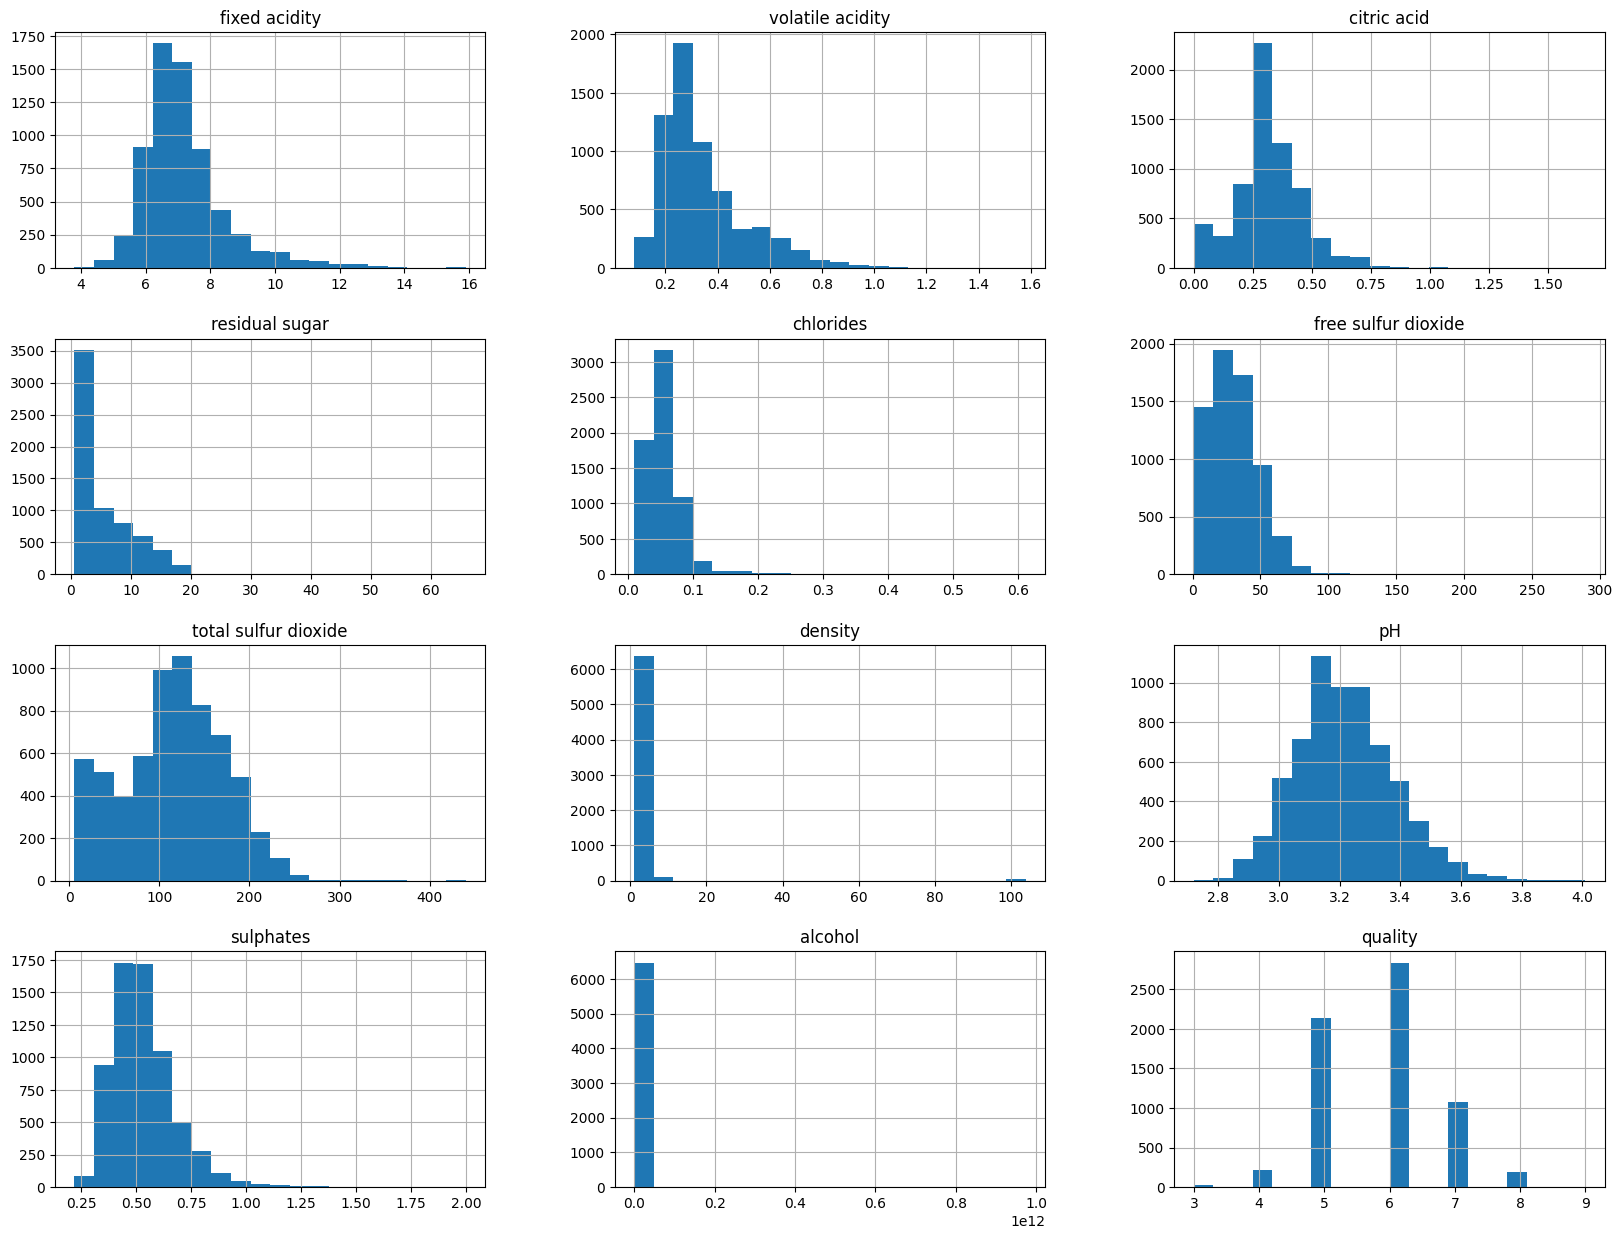

In [45]:
import matplotlib.pyplot as plt
arquivo.hist(figsize=(20, 15), bins=20)
plt.show()

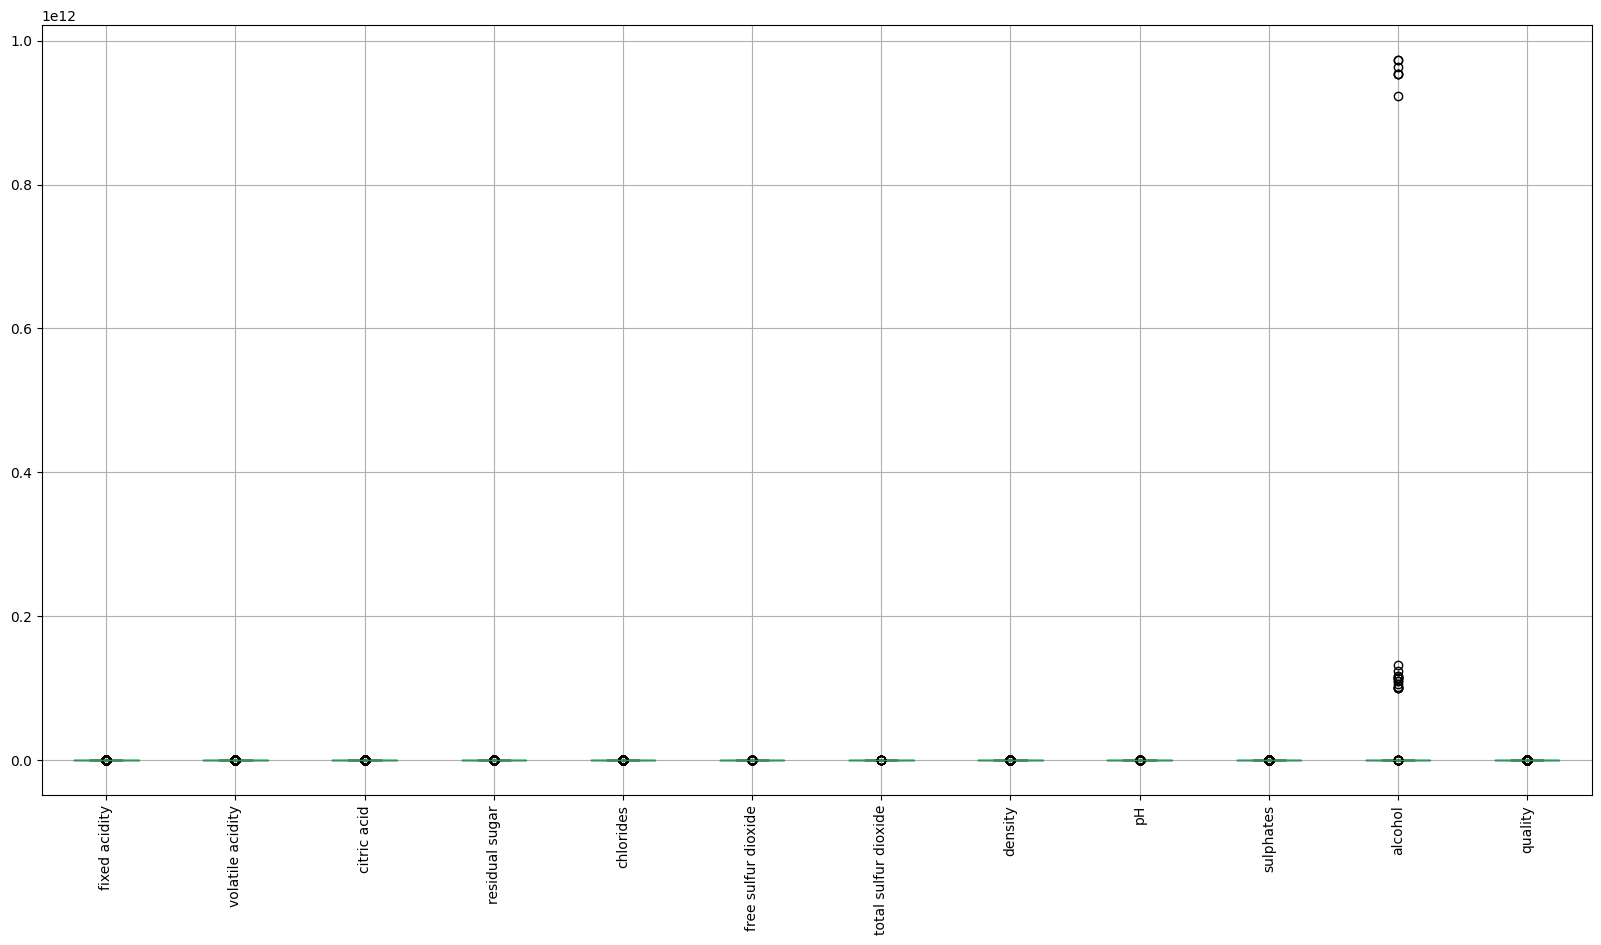

In [46]:
import matplotlib.pyplot as plt

arquivo.boxplot(figsize=(20, 10), rot=90)
plt.show()

In [47]:
# Check if 'color column exists in the DataFrame
arquivo['color'] = arquivo['color'].replace('red', 0)
arquivo['color'] = arquivo['color'].replace('white', 1)
arquivo['color'] = arquivo['color'].astype('int')
arquivo.info()
arquivo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [48]:
print(arquivo['quality'].value_counts(normalize=True) * 100)

quality
6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: proportion, dtype: float64


In [49]:
# Definindo o limiar para corte de vinhos bons como os de qualidade >=7
import numpy as np
arquivo['worst'] = np.where(arquivo['quality'] < 7, 1, 0)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1


In [52]:
arquivo.drop('quality', axis = 1) #Remover para evitar efeito de multicolinearidade

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,1


In [53]:
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1


In [55]:
y = arquivo['worst']
X = arquivo.drop('worst', axis = 1)

In [56]:
from sklearn.model_selection import train_test_split

# Assuming x is your feature set and y is the target variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 39)

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier()
modelo.fit(x_train, y_train)

ExtraTreesClassifier()

In [59]:
resultado = modelo.score(x_test, y_test)
print ("Acurácia:", resultado)



Acurácia: 0.9992307692307693


In [61]:
y_pred = modelo.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[ 257    1]
 [   0 1042]]


In [ ]:
"""
Calculando e exibindo as métricas de classificação.
Se algumas classes têm muito mais amostras do que outras, isso pode influenciar o desempenho e confiabilidade do modelo.

O "support" refere-se à quantidade de ocorrências da classe específica no conjunto de dados, sendo útil para verificar desbalanceamentos.
A "macro avg" calcula a média aritmética das métricas (precisão, recall, F1-score) para cada classe, sem considerar o número de instâncias em cada classe (support).
A "weighted avg" calcula a média ponderada das métricas para cada classe, considerando o número de instâncias em cada classe (support).
"""
print("Relatório de Classsificação:")
print(classification_report(y_test, y_pred))

Relatório de Classsificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       308
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



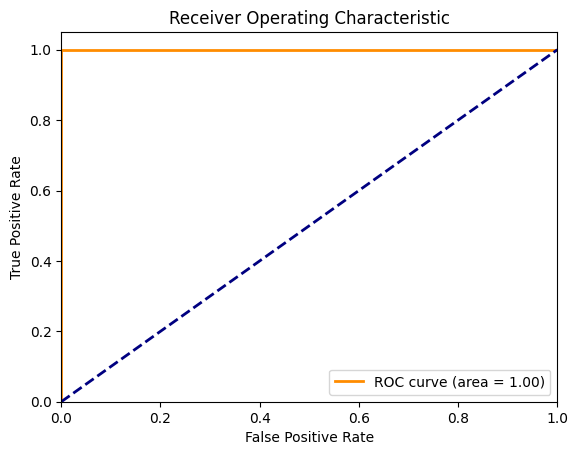

In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever as probabilidades para os dados de teste.
# Note que estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
y_probs = modelo.predict_proba(x_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
